In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import os
import sys
import urllib.request
import pandas as pd
import plotly.express as px
import json
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# 핫플 검색 키워드 만들기
def hotplace_keywords(name):
  l=['핫플', '핫플레이스', '맛집', '놀거리', '팝업', '팝업스토어', '힙플', '힙플레이스']
  ll=[]
  for j in name:
    for i in l:
      ll.append(j+i)
  return ll
print(hotplace_keywords(['성수','성수동']))

['성수핫플', '성수핫플레이스', '성수맛집', '성수놀거리', '성수팝업', '성수팝업스토어', '성수힙플', '성수힙플레이스', '성수동핫플', '성수동핫플레이스', '성수동맛집', '성수동놀거리', '성수동팝업', '성수동팝업스토어', '성수동힙플', '성수동힙플레이스']


In [ ]:
# 핫플 지명 리스트
hotplace_list=[
        {"groupName": "성수", "keywords": hotplace_keywords(['성수','성수동'])},
        {"groupName": "홍대", "keywords": hotplace_keywords(['홍대'])},
        {"groupName": "연남", "keywords": hotplace_keywords(['연남','연남동'])},
        {"groupName": "신촌", "keywords": hotplace_keywords(['신촌','연대'])},
        {"groupName": "이대", "keywords": hotplace_keywords(['이대'])},
        {"groupName": "잠실", "keywords": hotplace_keywords(['잠실','롯데타워'])},
        {"groupName": "석촌", "keywords": hotplace_keywords(['석촌','석촌호수'])},
        {"groupName": "송리단길", "keywords": hotplace_keywords(['송리단길'])},
        {"groupName": "더현대", "keywords": hotplace_keywords(['더현대','더현대서울'])},
        {"groupName": "여의도", "keywords": hotplace_keywords(['여의도'])},
        {"groupName": "합정", "keywords": hotplace_keywords(['합정'])},
        {"groupName": "망원", "keywords": hotplace_keywords(['망원','망리단길'])},
        {"groupName": "을지로", "keywords": hotplace_keywords(['을지로'])},
        {"groupName": "신당동", "keywords": hotplace_keywords(['신당동'])},
        {"groupName": "명동", "keywords": hotplace_keywords(['명동'])},
        {"groupName": "혜화", "keywords": hotplace_keywords(['혜화','대학로'])},
        {"groupName": "동대문", "keywords": hotplace_keywords(['동대문','DDP'])},
        # {"groupName": "동역사", "keywords": hotplace_keywords(['동대문','ddp','DDP','동역사','동대문문화역사공원역'])},
        {"groupName": "삼성", "keywords": hotplace_keywords(['삼성','코엑스'])},
        {"groupName": "강남", "keywords": hotplace_keywords(['강남'])},
        {"groupName": "신사", "keywords": hotplace_keywords(['신사','가로수길'])},
        {"groupName": "경리단길", "keywords": hotplace_keywords(['경리단길'])},
        {"groupName": "이태원", "keywords": hotplace_keywords(['이태원'])},
        {"groupName": "영등포", "keywords": hotplace_keywords(['영등포','타임스퀘어'])},
        {"groupName": "압구정", "keywords": hotplace_keywords(['압구정','압구정로데오'])},
        {"groupName": "북촌", "keywords": hotplace_keywords(['북촌','북촌한옥마을'])},
        {"groupName": "익선동", "keywords": hotplace_keywords(['익선동'])},
        {"groupName": "삼각지", "keywords": hotplace_keywords(['삼각지'])},
        {"groupName": "용산", "keywords": hotplace_keywords(['용산','용리단길'])},
        {"groupName": "문래", "keywords": hotplace_keywords(['문래동','문래'])},
        {"groupName": "공릉1", "keywords": hotplace_keywords(['공릉','공릉동'])},
        {"groupName": "공릉2", "keywords": hotplace_keywords(['공리단길'])},
        {"groupName": "안국", "keywords": hotplace_keywords(['안국'])},
        {"groupName": "서촌", "keywords": hotplace_keywords(['서촌','서촌마을'])},

    ]

In [ ]:
# 네이버 데이터랩 api 아이디 비번 불러오기
with open("secrets.json", "r") as f:
    secrets = json.load(f)
client_id = secrets['id']
client_secret = secrets['password']
url = "https://openapi.naver.com/v1/datalab/search";


In [ ]:
# 네이버 데이터랩 api 실행
df = pd.DataFrame(columns=['period_period', 'period_ratio', 'title'])
for i in hotplace_list:
  print(i)
  b={
    "startDate": "2021-01-01",
    "endDate": "2023-12-31",
    "timeUnit": "month",
    "keywordGroups": [i,]
  }
  body = json.dumps(b, ensure_ascii=False)

  request = urllib.request.Request(url)
  request.add_header("X-Naver-Client-Id",client_id)
  request.add_header("X-Naver-Client-Secret",client_secret)
  request.add_header("Content-Type","application/json")
  response = urllib.request.urlopen(request, data=body.encode("utf-8"))
  rescode = response.getcode()

  if(rescode==200):
    response_body = response.read()
    data = json.loads(response_body.decode('utf-8'))
    df1 = pd.json_normalize(data['results'], 'data', ['title'], record_prefix='period_')
    df=pd.concat([df, df1], ignore_index=True)
  else:
      print("Error Code:" + rescode)

{'groupName': '성수', 'keywords': ['성수핫플', '성수핫플레이스', '성수맛집', '성수놀거리', '성수팝업', '성수팝업스토어', '성수힙플', '성수힙플레이스', '성수동핫플', '성수동핫플레이스', '성수동맛집', '성수동놀거리', '성수동팝업', '성수동팝업스토어', '성수동힙플', '성수동힙플레이스']}
{'groupName': '홍대', 'keywords': ['홍대핫플', '홍대핫플레이스', '홍대맛집', '홍대놀거리', '홍대팝업', '홍대팝업스토어', '홍대힙플', '홍대힙플레이스']}
{'groupName': '연남', 'keywords': ['연남핫플', '연남핫플레이스', '연남맛집', '연남놀거리', '연남팝업', '연남팝업스토어', '연남힙플', '연남힙플레이스', '연남동핫플', '연남동핫플레이스', '연남동맛집', '연남동놀거리', '연남동팝업', '연남동팝업스토어', '연남동힙플', '연남동힙플레이스']}
{'groupName': '신촌', 'keywords': ['신촌핫플', '신촌핫플레이스', '신촌맛집', '신촌놀거리', '신촌팝업', '신촌팝업스토어', '신촌힙플', '신촌힙플레이스', '연대핫플', '연대핫플레이스', '연대맛집', '연대놀거리', '연대팝업', '연대팝업스토어', '연대힙플', '연대힙플레이스']}
{'groupName': '이대', 'keywords': ['이대핫플', '이대핫플레이스', '이대맛집', '이대놀거리', '이대팝업', '이대팝업스토어', '이대힙플', '이대힙플레이스']}
{'groupName': '잠실', 'keywords': ['잠실핫플', '잠실핫플레이스', '잠실맛집', '잠실놀거리', '잠실팝업', '잠실팝업스토어', '잠실힙플', '잠실힙플레이스', '롯데타워핫플', '롯데타워핫플레이스', '롯데타워맛집', '롯데타워놀거리', '롯데타워팝업', '롯데타워팝업스토어', '롯데타워힙플', '롯데타워힙플레이스']}
{'groupName': '석촌', 'key

In [ ]:
df['year'] = df['period_period'].str[:4]
df['period_period'] = pd.to_datetime(df['period_period'])
df['period_period'] = df['period_period'].dt.strftime('%Y-%m')
df.head()

,period_period,period_ratio,title,year
0,2021-01,15.52323,성수,2021
1,2021-02,25.29468,성수,2021
2,2021-03,29.92321,성수,2021
3,2021-04,30.67545,성수,2021
4,2021-05,37.13982,성수,2021


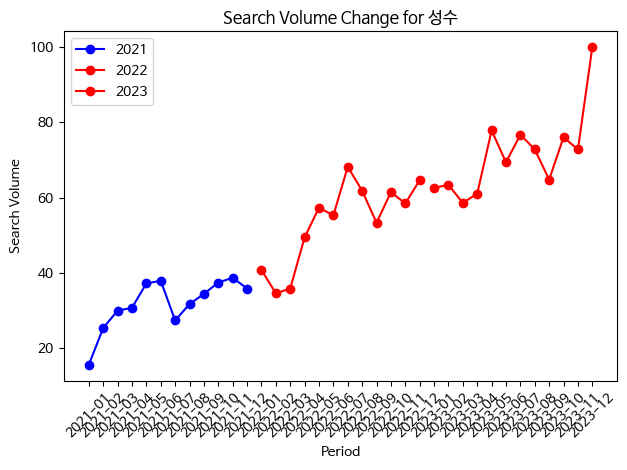

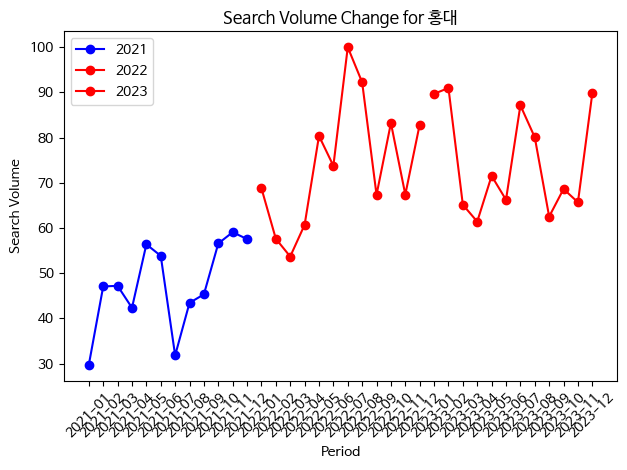

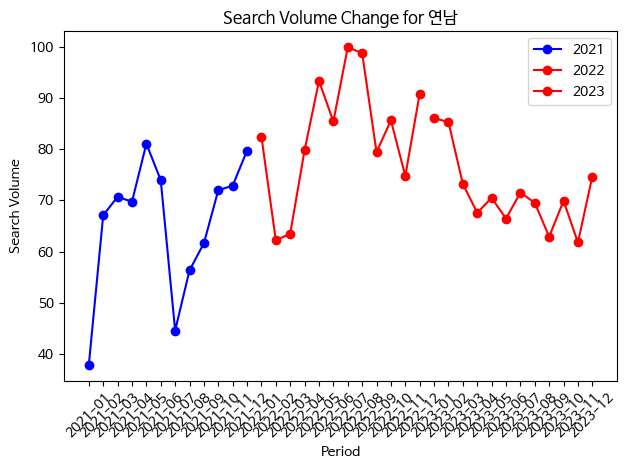

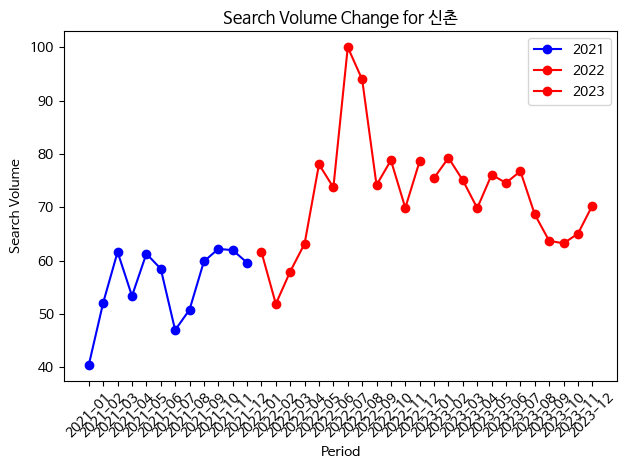

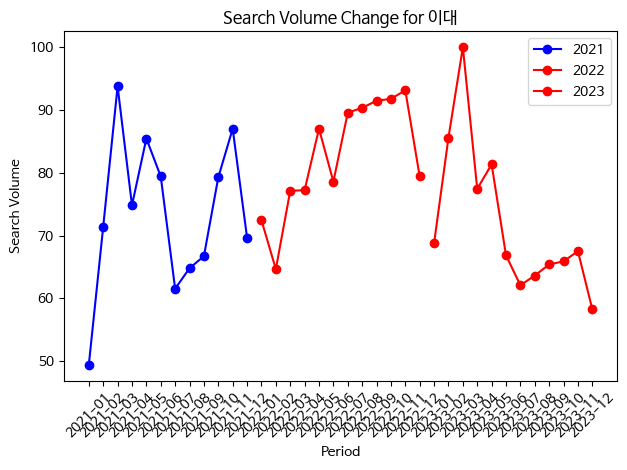

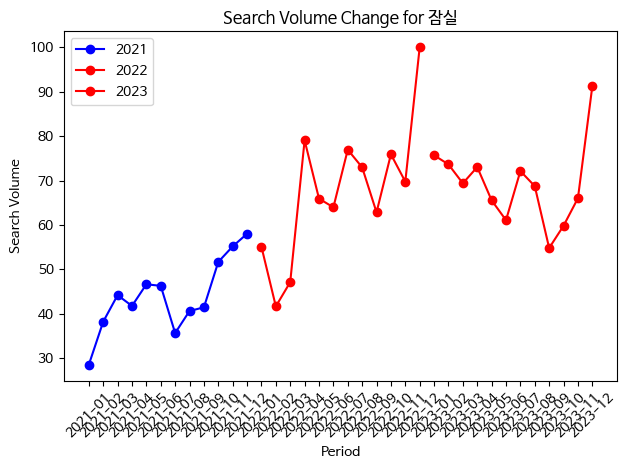

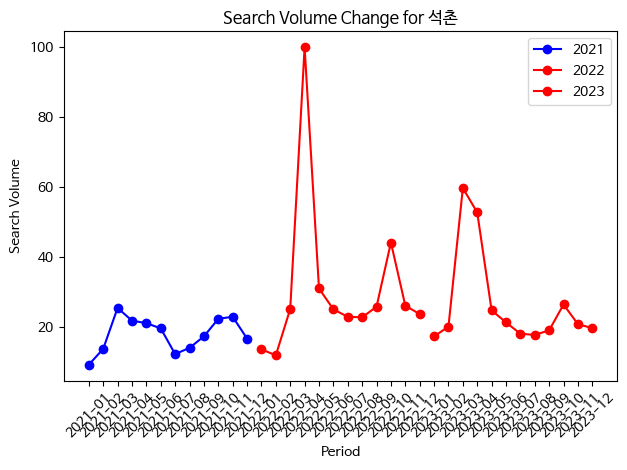

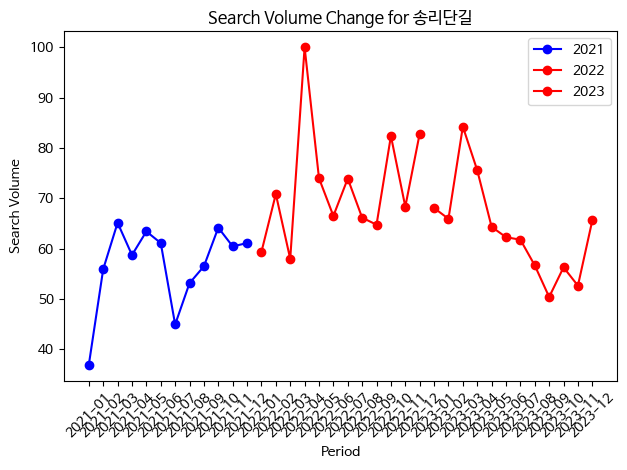

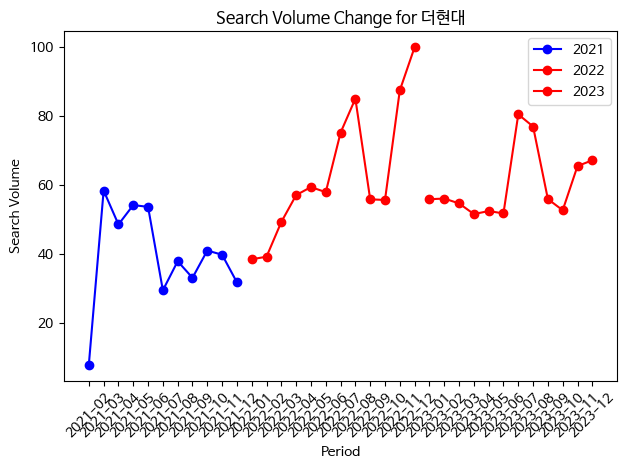

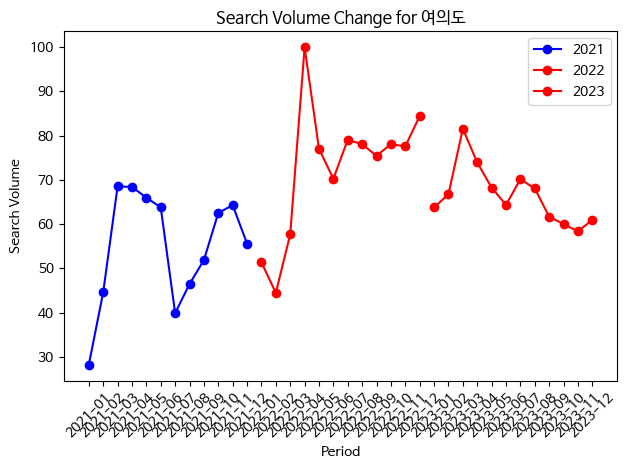

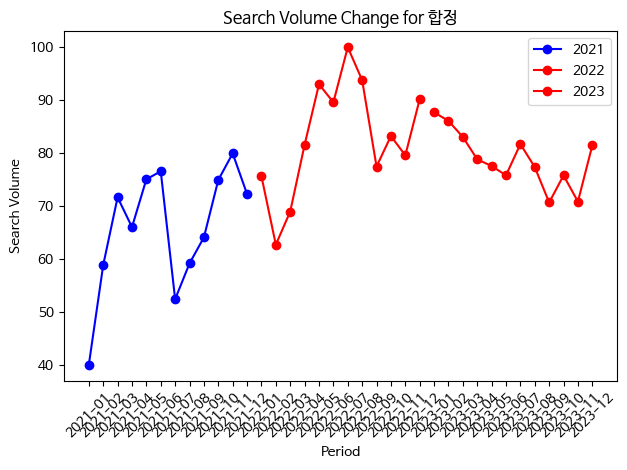

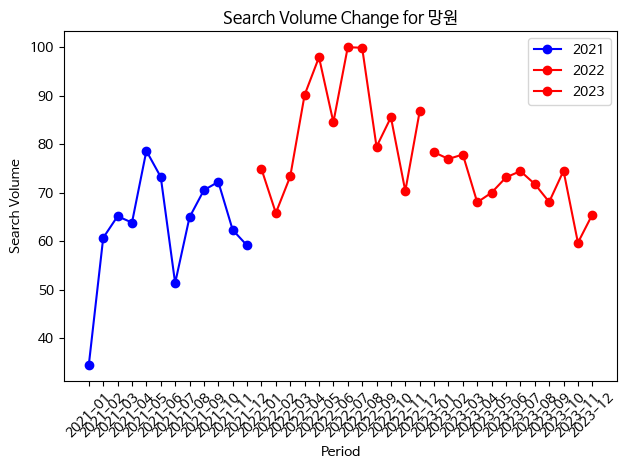

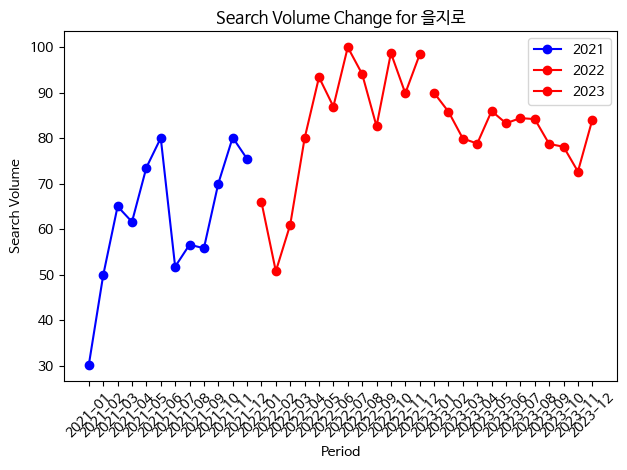

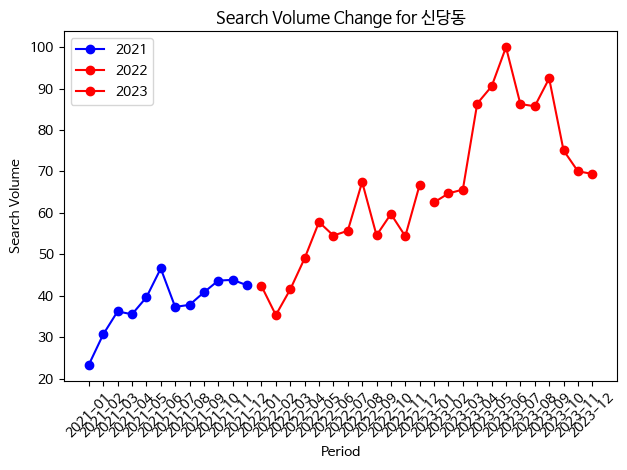

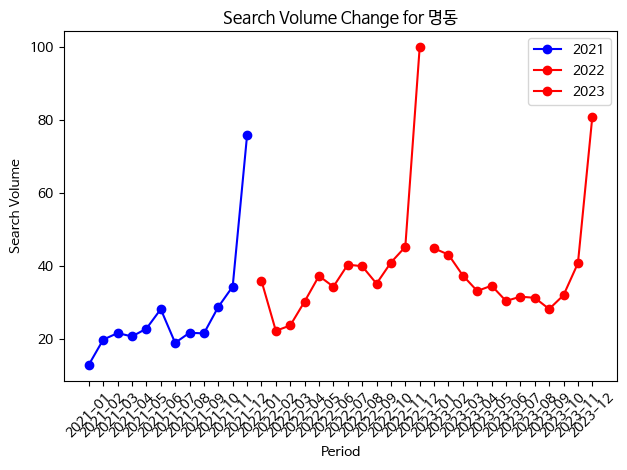

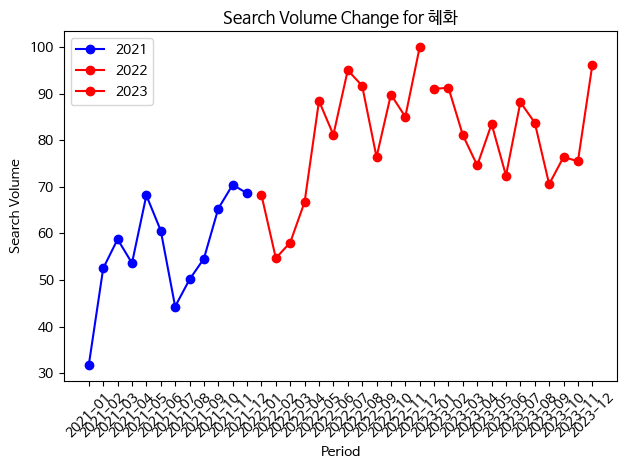

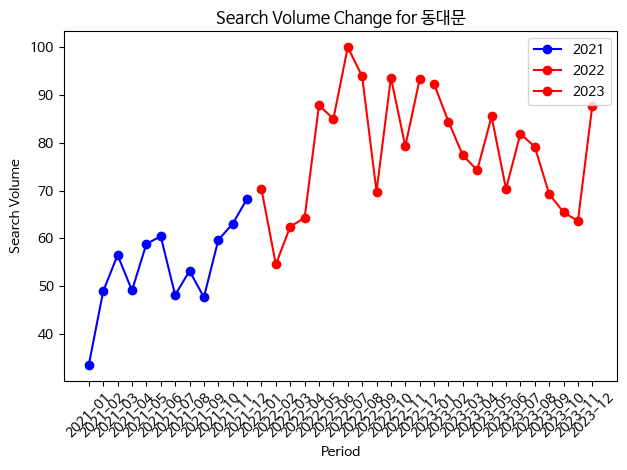

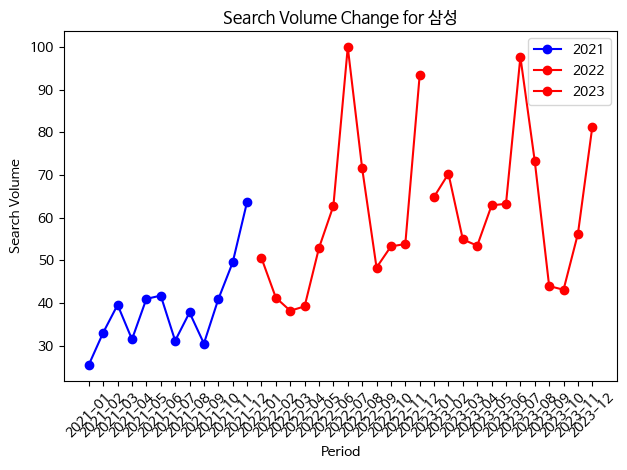

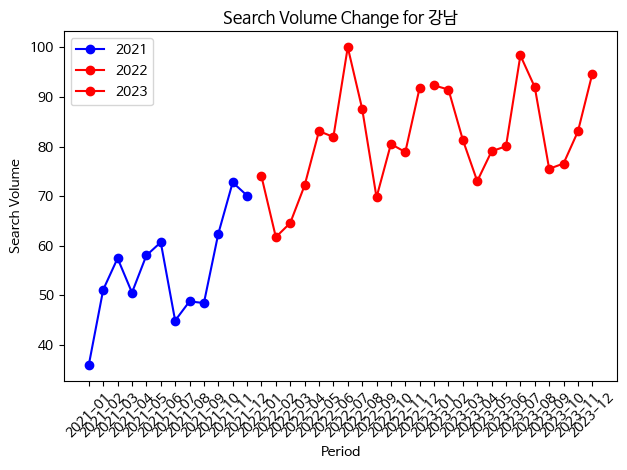

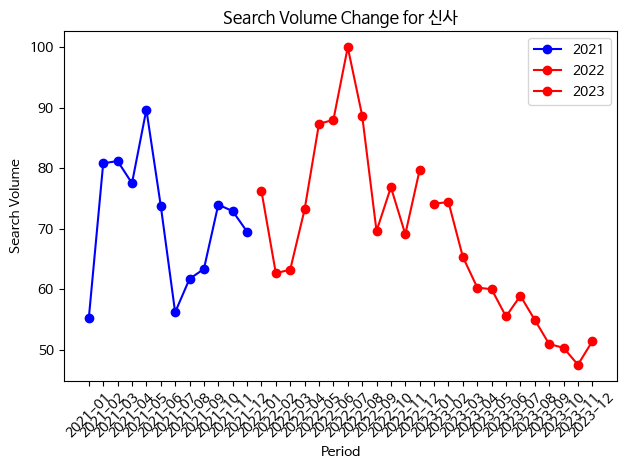

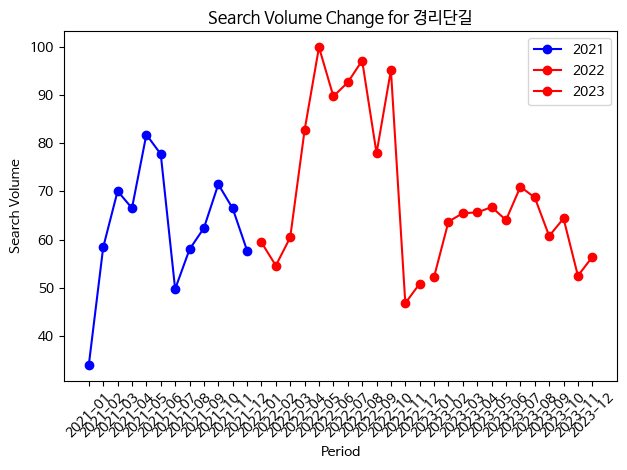

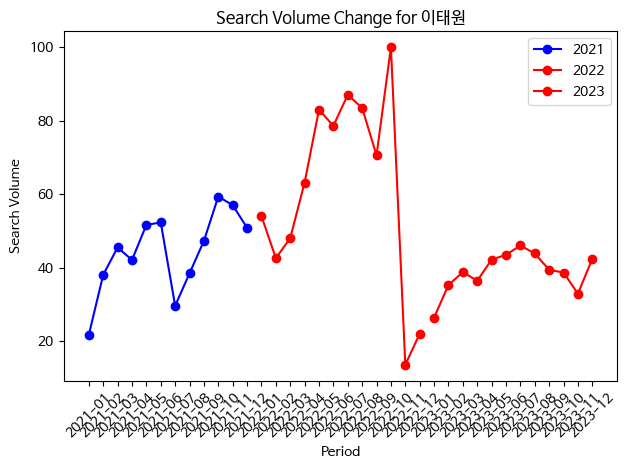

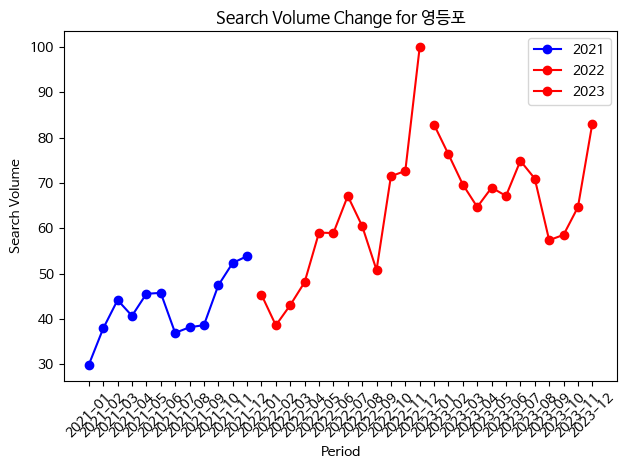

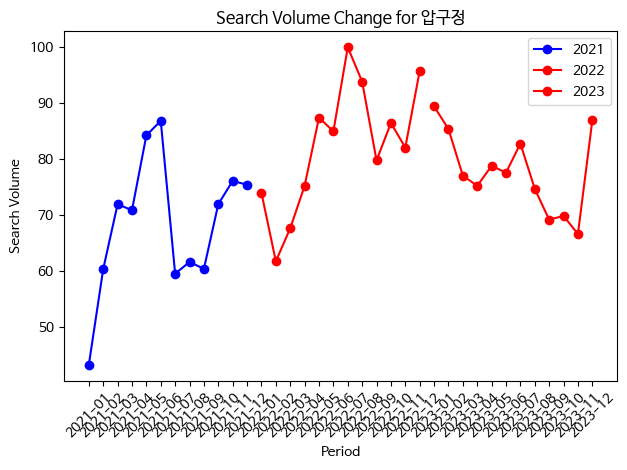

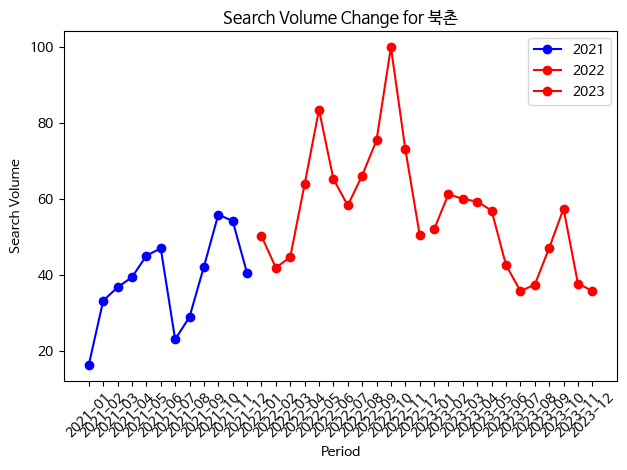

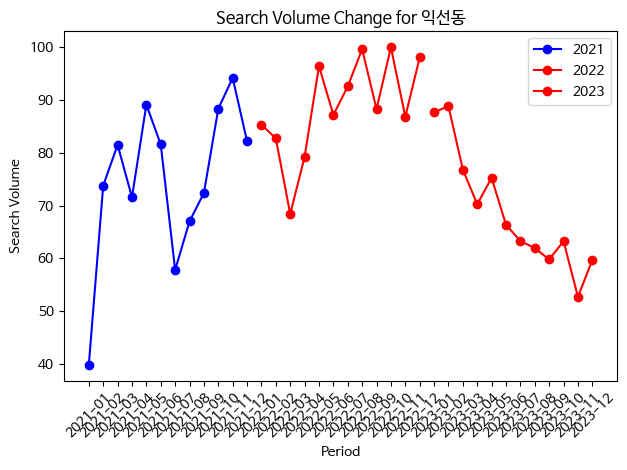

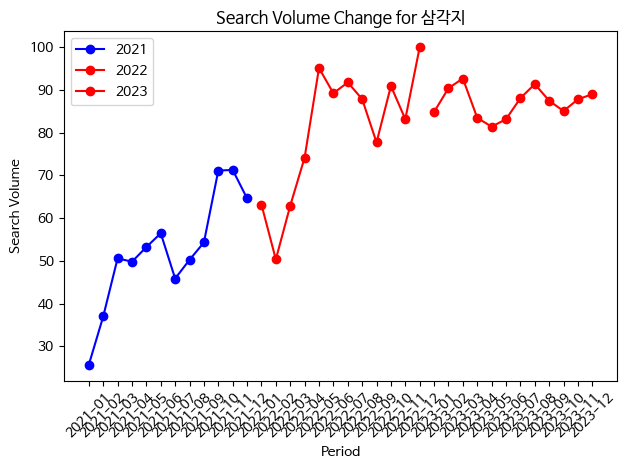

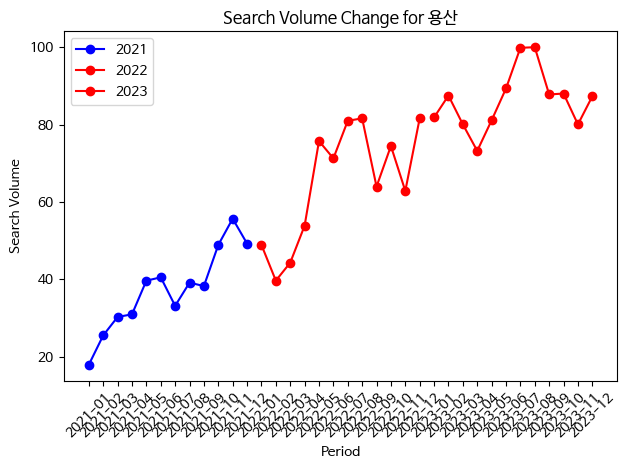

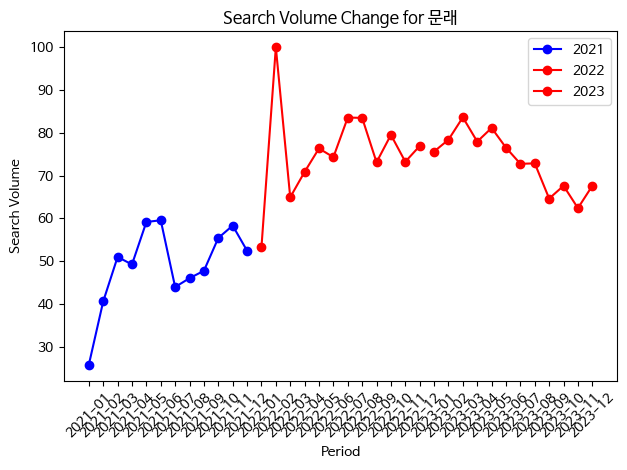

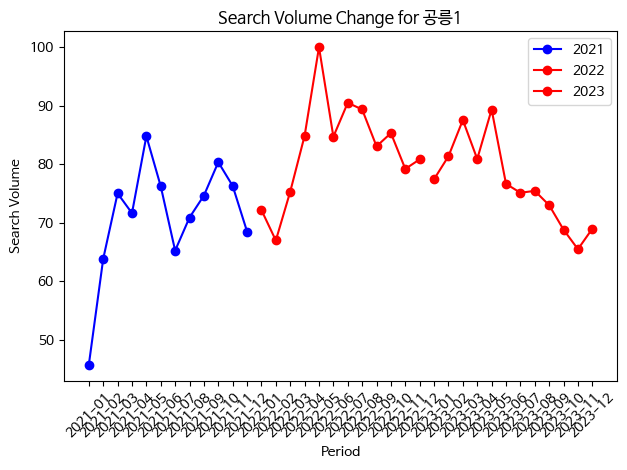

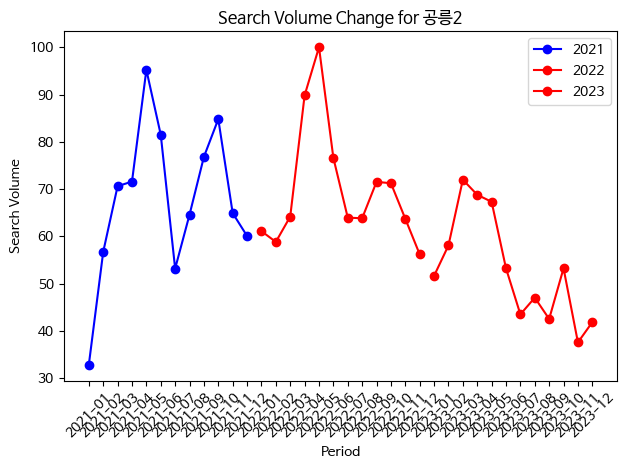

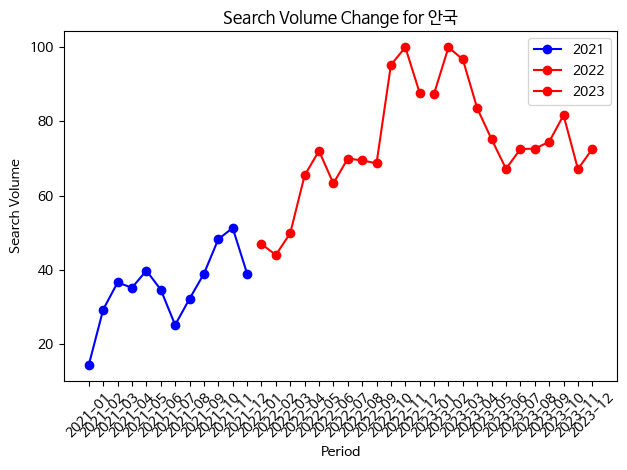

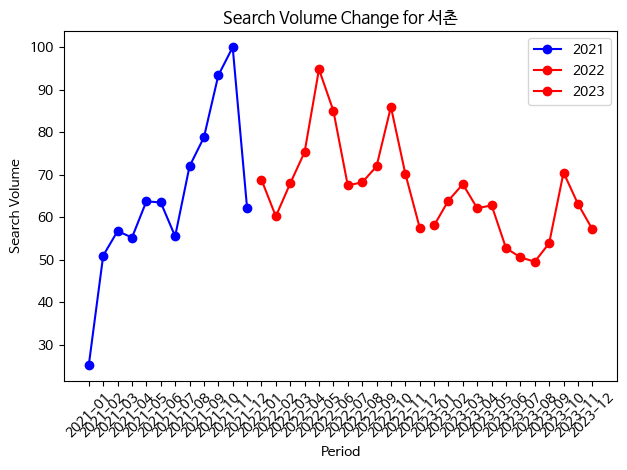

In [ ]:
# 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# 연도별 색상 설정
colors = {'2021': 'blue', '2022': 'red', '2023': 'red'}

# 각 지역별 그래프 그리기
for title in df['title'].unique():
    plt.figure()
    subset = df[df['title'] == title]

    for year in subset['year'].unique():
        year_subset = subset[subset['year'] == year]
        plt.plot(year_subset['period_period'], year_subset['period_ratio'], color=colors[year], marker='o', label=f'{year}')

    plt.title(f'Search Volume Change for {title}')
    plt.xlabel('Period')
    plt.ylabel('Search Volume')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
df.to_csv("naver_trend_data.csv", index=False, encoding='utf-8-sig')

In [ ]:
df.head()

,period_period,period_ratio,title
0,2021-01-01,15.52323,성수
1,2021-02-01,25.29468,성수
2,2021-03-01,29.92321,성수
3,2021-04-01,30.67545,성수
4,2021-05-01,37.13982,성수
